In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-12 06:40:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   202MB/s    in 2.5s    

2023-05-12 06:40:34 (202 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
train_dir="10_food_classes_all_data/train/"
test_dir ="10_food_classes_all_data/test/"

In [3]:
import pathlib
import numpy as np
import os
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (306, 512, 3)


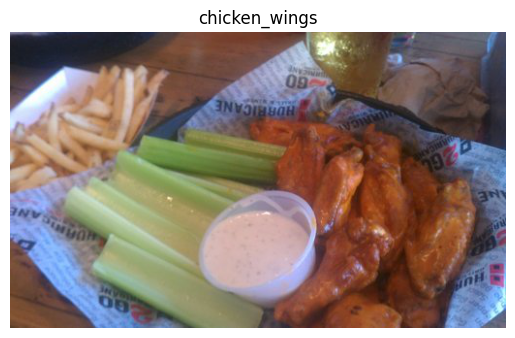

In [5]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) 

#preprocess the data


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode="categorical")

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#Create CNN


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation


model_1=Sequential([
                   Conv2D(10,3,input_shape=(224,224,3)),
      Activation(activation="relu"),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(10,activation="softmax")
                   ])

model_1.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics="accuracy")

#Fit the model

In [8]:
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                      
                      )

Epoch 1/5
235/235 [==============================] - 63s 226ms/step - loss: 2.2031 - accuracy: 0.2023 - val_loss: 2.0784 - val_accuracy: 0.2468
Epoch 2/5
235/235 [==============================] - 54s 229ms/step - loss: 1.8650 - accuracy: 0.3572 - val_loss: 1.9242 - val_accuracy: 0.3156
Epoch 3/5
235/235 [==============================] - 54s 228ms/step - loss: 1.3934 - accuracy: 0.5344 - val_loss: 2.0337 - val_accuracy: 0.3220
Epoch 4/5
235/235 [==============================] - 53s 224ms/step - loss: 0.8257 - accuracy: 0.7313 - val_loss: 2.5722 - val_accuracy: 0.3008
Epoch 5/5
235/235 [==============================] - 53s 224ms/step - loss: 0.3484 - accuracy: 0.9007 - val_loss: 3.5018 - val_accuracy: 0.2820


#evaluate model


In [9]:
model_1.evaluate(test_data)

79/79 [==============================] - 13s 158ms/step - loss: 3.5018 - accuracy: 0.2820


[3.5017898082733154, 0.28200000524520874]

In [10]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

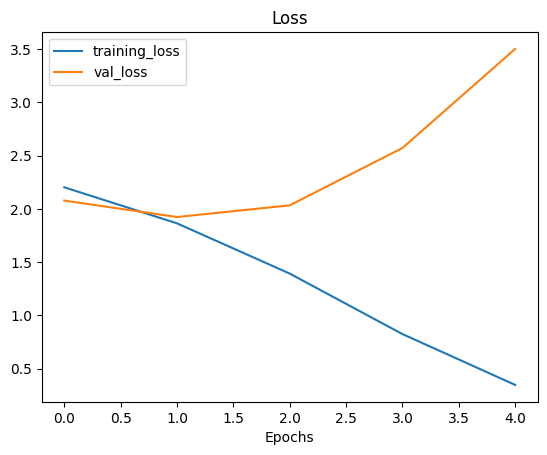

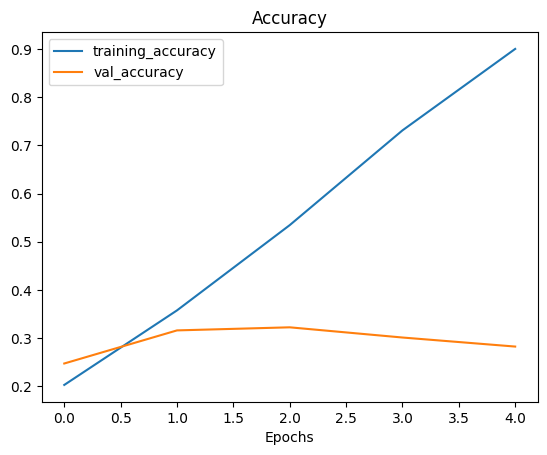

In [11]:
plot_loss_curves(history_1)

###Adjust the hyperparameters


In [12]:
model_2= Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")

])

model_2.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics="accuracy")

In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [14]:
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data)

  
  )

Epoch 1/5
235/235 [==============================] - 51s 212ms/step - loss: 2.0767 - accuracy: 0.2556 - val_loss: 1.8840 - val_accuracy: 0.3240
Epoch 2/5
235/235 [==============================] - 48s 206ms/step - loss: 1.7416 - accuracy: 0.4072 - val_loss: 1.8903 - val_accuracy: 0.3268
Epoch 3/5
235/235 [==============================] - 48s 203ms/step - loss: 1.3698 - accuracy: 0.5519 - val_loss: 1.9149 - val_accuracy: 0.3424
Epoch 4/5
235/235 [==============================] - 48s 204ms/step - loss: 0.9070 - accuracy: 0.7248 - val_loss: 2.1939 - val_accuracy: 0.3152
Epoch 5/5
235/235 [==============================] - 48s 204ms/step - loss: 0.5038 - accuracy: 0.8591 - val_loss: 2.4776 - val_accuracy: 0.3132


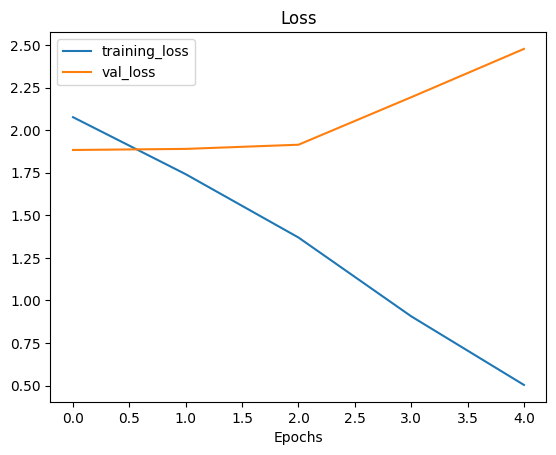

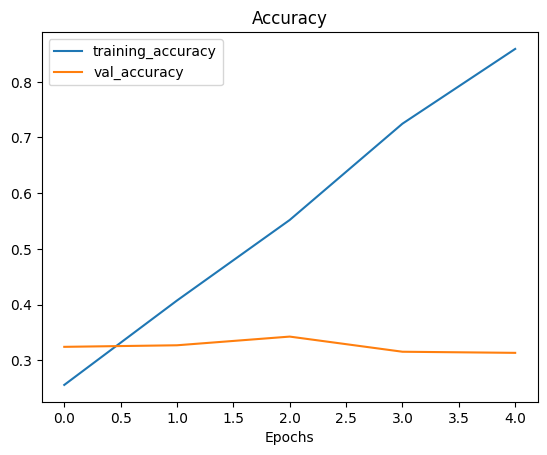

In [15]:
plot_loss_curves(history_2)

#use data augmentation because simplyfiny is not enough

In [16]:
train_datagen_aug=ImageDataGenerator(rescale=1/255.,
                                     rotation_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True
                                     )

train_data_aug=train_datagen_aug.flow_from_directory(train_dir,
                                 target_size=(224,224),
                                 batch_size=32,
                                 class_mode="categorical"
                                 )

Found 7500 images belonging to 10 classes.


In [17]:
model_3= Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")

])

model_3.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics="accuracy")

In [18]:
history_3=model_3.fit(train_data_aug,
                      epochs=5,
                      steps_per_epoch=len(train_data_aug),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 120s 504ms/step - loss: 2.2008 - accuracy: 0.1875 - val_loss: 1.9950 - val_accuracy: 0.2980
Epoch 2/5
235/235 [==============================] - 122s 518ms/step - loss: 2.0584 - accuracy: 0.2692 - val_loss: 1.9696 - val_accuracy: 0.3156
Epoch 3/5
235/235 [==============================] - 119s 508ms/step - loss: 1.9837 - accuracy: 0.3045 - val_loss: 1.8465 - val_accuracy: 0.3672
Epoch 4/5
235/235 [==============================] - 122s 520ms/step - loss: 1.9361 - accuracy: 0.3267 - val_loss: 1.7541 - val_accuracy: 0.4152
Epoch 5/5
235/235 [==============================] - 118s 502ms/step - loss: 1.8954 - accuracy: 0.3465 - val_loss: 1.7273 - val_accuracy: 0.4168


In [19]:
model_3.evaluate(test_data)


79/79 [==============================] - 12s 151ms/step - loss: 1.7273 - accuracy: 0.4168


[1.7273390293121338, 0.41679999232292175]

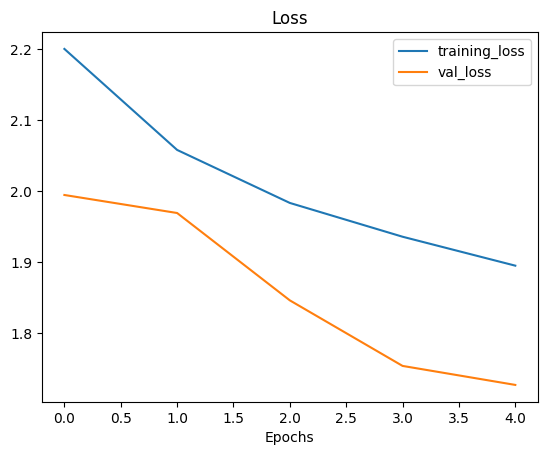

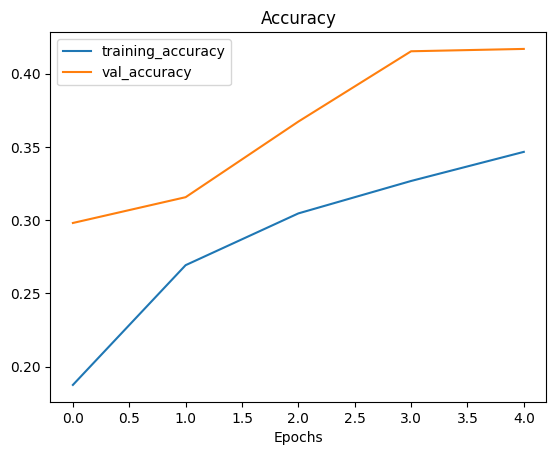

In [20]:
plot_loss_curves(history_3)

#repeat

In [21]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [28]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [29]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

1/1 [==============================] - 0s 236ms/step


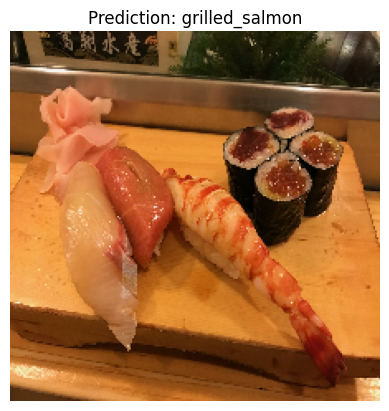

In [30]:
pred_and_plot(model_3, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 53ms/step


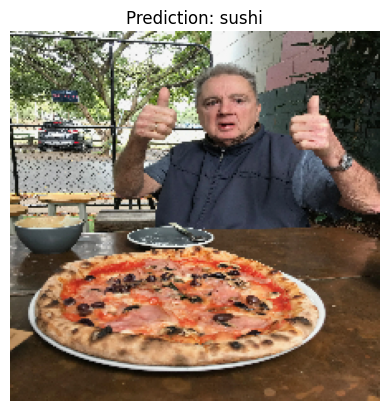

In [31]:
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 18ms/step


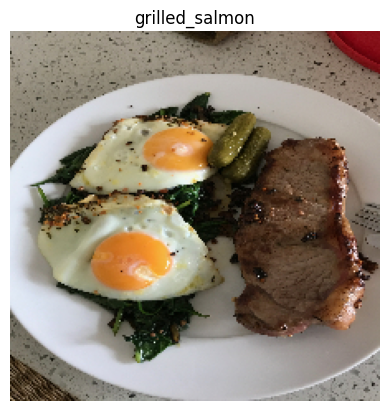

In [33]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_3.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

#Save model

In [37]:
# Save a model
model_3.save("saved_trained_model_3")

#Load model

In [38]:
loaded_model_3=tf.keras.models.load_model("saved_trained_model_3")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 1.7273 - accuracy: 0.4168


[1.7273389101028442, 0.41679999232292175]